Rishi Shah
178003549
Dataset 1

In [405]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

from PIL import Image
from sklearn import preprocessing as sklpp
from sklearn.decomposition import PCA
import glob
import seaborn as sbn
import os 
import time 

from sklearn.preprocessing import StandardScaler
from skimage.transform import resize
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
import sklearn.metrics

In [406]:
trainImgs = '/Users/RishiShah/Desktop/ML Project/DataSet1/dogCatDataset/training_set/training_set/'
testImgs = '/Users/RishiShah/Desktop/ML Project/DataSet1/dogCatDataset/test_set/test_set/'
labels = ['dogs','cats']


## a. Brief explanation of dataset


In [407]:
trainSet= pd.DataFrame(columns=["picture","label"])
testSet = pd.DataFrame(columns=["picture","label"])

for i in labels:
    for img in os.listdir(trainImgs + i):
        if not img == '.DS_Store':
            trainSet = trainSet.append({"picture": img,"label":i},True)

for i in labels:
    for img in os.listdir(testImgs + i):
        if not img == '.DS_Store':
            testSet = testSet.append({"picture": img,"label":i},True)

In [408]:
print("There are ",trainSet.shape[0]," samples for training set.")
print("There are ",testSet.shape[0]," samples for test set.")

There are  8000  samples for training set.
There are  2000  samples for test set.


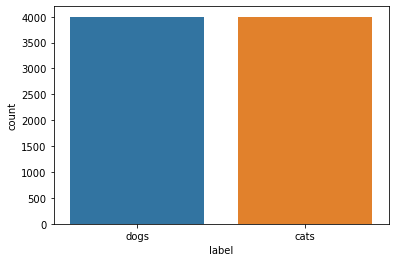

In [409]:
sbn.countplot(x="label",data=trainSet)

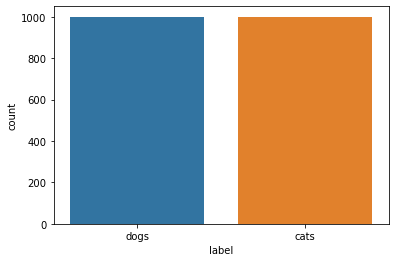

In [410]:
sbn.countplot(x="label",data=testSet)

There are 2 labels in this dataset: dog and cat. They both have an equal amount of samples in both the train and test dataset, as shown by the histogram. In total, there are 8000 samples in the training dataset, meaning there's 4000 of each class. Similarly, theres 2000 samples in the test dataset, meaning theres 1000 of each class. 

In [411]:
w1, h1 = Image.open(trainImgs + trainSet.iloc[0][1] + '/' + trainSet.iloc[0][0]).size
w2, h2 = Image.open(trainImgs + trainSet.iloc[1][1] + '/' + trainSet.iloc[1][0]).size
print(w1,h1)
print(w2,h2)

393 392
499 375


In [412]:
w1, h1 = Image.open(trainImgs + trainSet.iloc[4080][1] + '/' + trainSet.iloc[4080][0]).size
w2, h2 = Image.open(trainImgs + trainSet.iloc[4012][1] + '/' + trainSet.iloc[4012][0]).size
print(w1,h1)
print(w2,h2)

287 389
500 378


Above I have taken images from both the dog and cat folders and compared their sizes. Because, they are different, it is wise to resize ALL the images in the dataset to be the same size so they have the same # of features. 

In addition, because this is an image dataset, the number of features is going to be very high, since you have to factor in not only the size of the images, but also the RGB pixels. 

## b. Pre-Processing

In [413]:
trainImgArr  = []
trainLabelsArr  = []
testImgArr = []
testLabelsArr = []

for i in range(trainSet.shape[0]):
    label = trainSet.iloc[i][1]
    img = Image.open(trainImgs + label + '/' + trainSet.iloc[i][0])
    img = img.convert("L") #convert to greyscale 
    img = img.resize((150,150))

    arr = (np.array(img)).flatten()
    trainImgArr.append(arr)
    img.close()

    if label == 'dogs':
        trainLabelsArr.append(0)
    else:
        trainLabelsArr.append(1)
   

for i in range(testSet.shape[0]):
    label = testSet.iloc[i][1]
    img = Image.open(testImgs + label + '/' + testSet.iloc[i][0])
    img = img.convert("L") #convert to greyscale 
    img = img.resize((150,150))

    arr = (np.array(img)).flatten()
    testImgArr.append(arr)
    img.close()

    if label == 'dogs':
        testLabelsArr.append(0)
    else 'cats':
        testLabelsArr.append(1)


For this first pre-processing step, I converted all the images to grey-scale to lower the amount of features. I also resized the images to 150x150 to make sure all the images in the test and training datasets had the same amount of features. This will help assist with computation time later on. 

In [414]:
scalar = StandardScaler()
trainImgArr = scalar.fit_transform(trainImgArr)

In [415]:
testImgArr = scalar.fit_transform(testImgArr)

For this next pre-processing step, I used the np arrays for images for train and test. I used StandaredScaler because it converts the data to have 0 mean and 1 variance (Gaussian). This standardization is very important for PCA and even classification methods because it ensures that the data is centered and has limited variance. 

## c. Feature Learning

In [416]:
pca = PCA(n_components = 0.92)
pca.fit(trainImgArr)

PCA(n_components=0.92)

In [417]:
pcaTrain = pca.transform(trainImgArr)
pcaTest = pca.transform(testImgArr)

In [418]:
print("Original number of features: ", trainImgArr[0].shape[0])
print("New number of features after PCA ", pcaTrain[0].shape[0])

Original number of features:  22500
New number of features after PCA  378


In [419]:
print("Original number of features: ", testImgArr[0].shape[0])
print("New number of features after PCA: ", pcaTest[0].shape[0])

Original number of features:  22500
New number of features after PCA:  378


For the feature learning step, I used PCA. I am working with images in this dataset, which means that the number of features is very high. It is definitely more than the number of samples even if the pictures are converted to greyscale (as you can see above). PCA reduces these features significantly, while keeping the general trends and patterns, so that computation time later on can be reduced. 

## d. Processing of Each Dataset With 3 Different ML Algorithms

In [420]:
xTrain, yTrain = shuffle(pcaTrain, trainLabelsArr)
xTest, yTest = shuffle(pcaTest, testLabelsArr)

I shuffle the data here to avoid any bias in the dataset when doing cross validation for hyperparameters. When loading in the dataset, all the dog values were at the top and all the cat values were at the bottom, as they were in 2 separate folders. This shuffle method will help randomize order of all these images so they are not grouped anymore. 

### a. Logistic Regression

In [421]:
from sklearn.linear_model import LogisticRegressionCV as lrcv

In [442]:
Cs = [100, 10, 1, 0.1, 0.01]
logisticTime = time.time()
lr = lrcv(Cs = Cs, cv = 5, tol = 0.1, max_iter=5000).fit(xTrain, yTrain)
lrResults = lr.predict(xTest)
logisticTime = (time.time() - logisticTime)

print(logisticTime)

2.7152230739593506


In [451]:
print("Accuracy: ", sklearn.metrics.accuracy_score(yTest,lrResults))

Accuracy:  0.5495


Text(0.5, 0.98, 'Confusion Matrix for Logistic Regression')

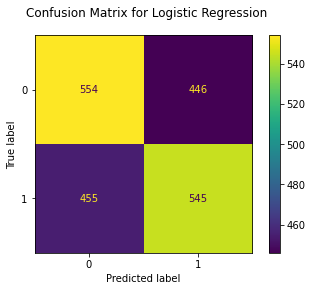

In [427]:
LR_confusion_matrix = sklearn.metrics.plot_confusion_matrix(lr, xTest, yTest)
LR_confusion_matrix.figure_.suptitle("Confusion Matrix for Logistic Regression")

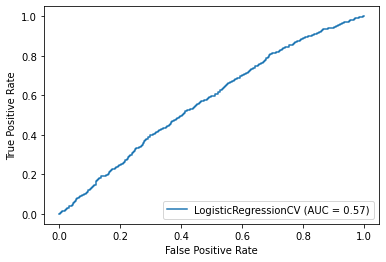

In [428]:
lrROC = sklearn.metrics.plot_roc_curve(lr,xTest,yTest)

I chose to do logistic regression here mainly because I was doing binary classification, which it is suited for. The function, logistic regression cv (lrcv) is a cross validation estimator, which means it finds the best hyperparameters (C in this case) from the given inputs. It does this by using Stratified K-Fold Cross Validation, which is basically the same as regular K-Fold CV except it preserves the percentage of samples for each class. I used 5 folds here to find the best hyperparameter out of 5 different values that were each different powers of 10. It automatically selected the best hyperparameter and uses that for the model. I can use this type of cross validation for this dataset because there is both separate testing and training data. 

### b. LDA

In [352]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
ldaTime = time.time()
ldaClf = lda().fit(xTrain,yTrain)
ldaResults = ldaClf.predict(xTest)
ldaTime = time.time() - ldaTime
print(ldaTime)

0.7787940502166748


In [449]:
print("Accuracy: ", sklearn.metrics.accuracy_score(yTest,ldaResults))

Accuracy:  0.5495


Text(0.5, 0.98, 'Confusion Matrix for LDA')

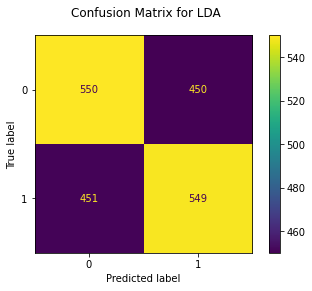

In [281]:
LDA_confusion_matrix = sklearn.metrics.plot_confusion_matrix(ldaClf, xTest, yTest)
LDA_confusion_matrix.figure_.suptitle("Confusion Matrix for LDA")

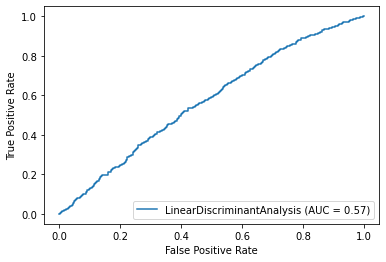

In [291]:
ldaROC = sklearn.metrics.plot_roc_curve(ldaClf,xTest,yTest)

I did Linear Discriminant Analysis here because the data is Gaussian from when I standardized the data earlier using StandardScaler, which means the mean/average is 0 and the variance is 1.  I do not have to do k-fold cross-validation here at all because LDA has no hyperparameter and there is separate test and train data. 

### c. SVC

In [337]:
from sklearn.svm import SVC as SVC

In [361]:
folds = KFold(n_splits=5)
Cs = [10, 1, 0.1, 0.01,0.001]
count = 0

yTrain = np.array(yTrain)
for i, j in folds.split(xTrain):
    cvXTrain, cvXTest = xTrain[i],xTrain[j]
    cvYTrain, cvYTest = yTrain[i],yTrain[j]

    svcClf = SVC(C=Cs[count], kernel = 'rbf', tol = 0.1, max_iter=5000)
    svcClf.fit(cvXTrain,cvYTrain)

    svcResults = svcClf.predict(cvXTest)
    print("C value: ", Cs[count]," Accuracy: ", sklearn.metrics.accuracy_score(cvYTest, svcResults), "Validation Error: ", sklearn.metrics.mean_squared_error(cvYTest, svcResults))

    count = count+1



  

C value:  10  Accuracy:  0.60125 Validation Error:  0.39875
C value:  1  Accuracy:  0.635625 Validation Error:  0.364375
C value:  0.1  Accuracy:  0.606875 Validation Error:  0.393125
C value:  0.01  Accuracy:  0.55375 Validation Error:  0.44625
C value:  0.001  Accuracy:  0.490625 Validation Error:  0.509375


Here, I run k-folds cross validation across 5 folds to test 5 different potential hyperparameter (C) values. At first, I tested decreasing powers of 10s from 10 to 0.001. From there, I found that 1 was the best C value due to its high accuracy (and thus low validation error). Because C = 1 was the best accuracy, I used it as my regularization parameter in the next step. 

In [362]:
svcTime = time.time()
svcClf = SVC(C=1, tol=0.1, kernel = 'rbf', max_iter = 5000).fit(xTrain,yTrain)
svcResults = svcClf.predict(xTest)
svcTime = time.time() - svcTime
print(svcTime)

36.0961229801178


I do not need to do cross-validation here because there is separate test and train data. 

In [450]:
print("Accuracy: ", sklearn.metrics.accuracy_score(yTest,svcResults))


Accuracy:  0.65


Text(0.5, 0.98, 'Confusion Matrix for SVC')

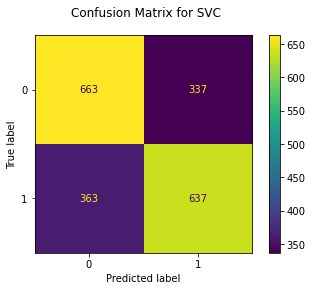

In [341]:
SVC_confusion_matrix = sklearn.metrics.plot_confusion_matrix(svcClf, xTest, yTest)
SVC_confusion_matrix.figure_.suptitle("Confusion Matrix for SVC")

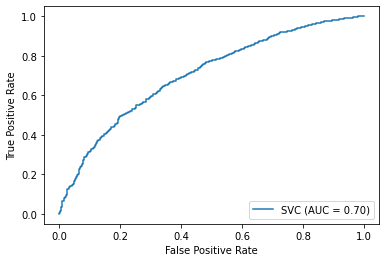

In [342]:
svcROC = sklearn.metrics.plot_roc_curve(svcClf,xTest,yTest)

One reason why I chose to use SVC with the radial kernel here is because the data may not be linearly separable. SVC uses the kernel trick to transform our data into higher dimensions to form better decision boundaries. This is likely why the accuracy is better here than the other two methods.

## e. Comparison Analysis of 3 Methods

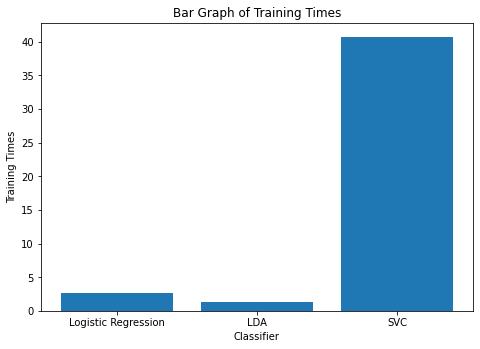

In [445]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Logistic Regression', 'LDA', 'SVC']
values = [logisticTime, ldaTime, svcTime]
ax.bar(labels, values)
ax.set_xlabel('Classifier')
ax.set_ylabel('Training Times')
ax.set_title("Bar Graph of Training Times")
fig.show()



SVC takes the longest time to run here because it uses a radial kernel, which involves a more complex method than the other two classifiers since it takes time to transform the data into higher dimensions. SVC also takes the longest time because it involves cross-validaiton to find the best hyperparameter. Logistic Regression is also slower than LDA for this reason. LDA, on the other hand, does not take much time at all because no hyperparameters are necessary so thus there is no cross-validation. 

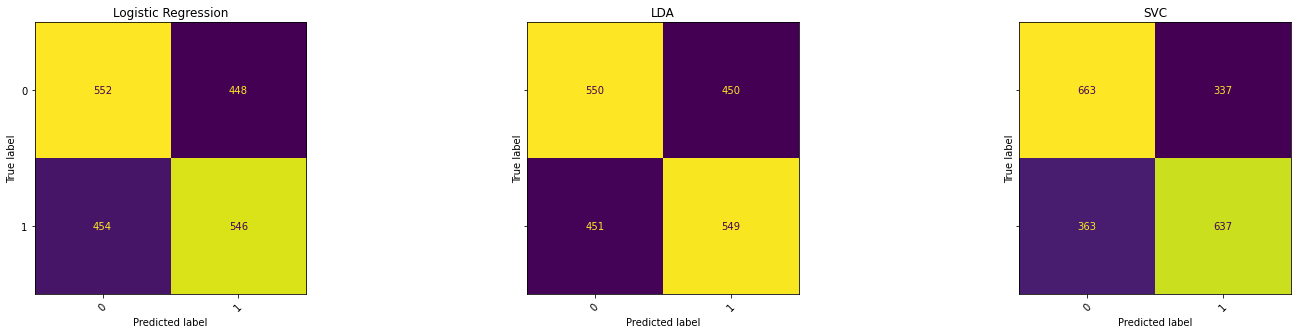

In [423]:
#describe confusion matrices and ROC differences/purposes here
#can only use ROC for binary
fig, axes = plt.subplots(1,3, figsize=(25,5), sharey = 'row')
classifiers = [lr, ldaClf, svcClf]
classifierName = ['Logistic Regression', 'LDA', 'SVC']

for i in range(3):
    confusionMatrix = sklearn.metrics.plot_confusion_matrix(classifiers[i], xTest, yTest, xticks_rotation=45, ax = axes[i])
    confusionMatrix.ax_.set_title(classifierName[i])
    confusionMatrix.im_.colorbar.remove()
  



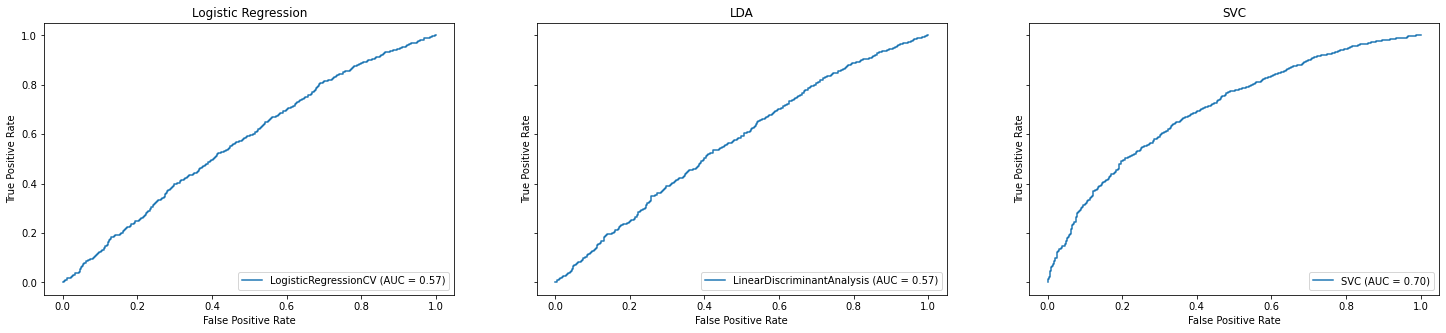

In [404]:
From these confusion matrices, we can tell that SVC was the best classifier out of the 3. This is because it had the most true positives and true negatives (663 and 638 respectively) and thus the least false positives and negatives (337 and 363 respectively). This lead to a higher accuracy of 65% compared to the other two which had an accuracy of about 55%. 

#describe confusion matrices and ROC differences/purposes here
#can only use ROC for binary
fig, axes = plt.subplots(1,3, figsize=(25,5), sharey = 'row')
classifiers = [lr, ldaClf, svcClf]
classifierName = ['Logistic Regression', 'LDA', 'SVC']

for i in range(3):
    roc = sklearn.metrics.plot_roc_curve(classifiers[i], xTest, yTest, ax = axes[i])
    roc.ax_.set_title(classifierName[i])
  
  



These ROC curves can be plotted because I am dealing with a binary classification problem. These are a plot of the false positive rate vs the true positive rate over a variety of threshold values. The AUC (area under curve) score that is displayed on the box of each of these figures represents how good the model was. In other words, it tells us how good the model is at distinguishing between classes As SVC has the highest AUC score and since it's closest to the maximum value of 1, we know that SVC was the best model out of the 3.

It is evident from these findings that SVC should be used for this dataset (at least from the three classifiers that I chose). One reason this may be true is because the data may not be linearly separable, and using a non-linear kernel like the rbf (radial kernel) in SVC, allowed for better accuracy.

## f. Ethical Issues for Dataset

An ethical issue arises for this dataset because of the fact that we are taking pictures of living things (dogs and cats). These animals likely are pets and thus owned by other people. This is a violation of their privacy since you're sharing these pictures with other people. Another potential issue is that in these types of images, you can see the inside of people's houses in the background. This too is a privacy issue.

## g. Bibliography

“3.2.4.1.5. Sklearn.linear_model.LogisticRegressionCV.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html. 

Brownlee, Jason. “How to Use ROC Curves and Precision-Recall Curves for Classification in Python.” Machine Learning Mastery, 21 Aug. 2020, machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/. 

“Plotting Multiple Confusion Matrix Side by Side.” Stack Overflow, 1 June 1969, stackoverflow.com/questions/61825227/plotting-multiple-confusion-matrix-side-by-side. 

Schubert, Sly. “Cat and Dog.” Kaggle, 26 Apr. 2018, www.kaggle.com/tongpython/cat-and-dog. 

“Sklearn.discriminant_analysis.LinearDiscriminantAnalysis.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html. 

“Sklearn.metrics.plot_roc_curve.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html. 

“Sklearn.svm.SVC.” Scikit, scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html. 